In [2]:
from keras import applications
from keras.models import Sequential
from keras.layers import Flatten, Dense

#Resnet
resnet = Sequential()
pretrained_model = applications.ResNet50(include_top=False,
                                        input_shape=(120, 120, 3),
                                        pooling='max',
                                        classes=2,
                                        weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable=False

resnet.add(pretrained_model)
resnet.add(Flatten())
resnet.add(Dense(512, activation='relu'))
resnet.add(Dense(1, activation='sigmoid'))

In [3]:
resnet.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"] )

In [5]:
from numpy import load

X = load("/home/mwaniki-new/Documents/deep_learning/Cats_Dogs/X_train_1.npy",mmap_mode='r')
y = load("/home/mwaniki-new/Documents/deep_learning/Cats_Dogs/Y_train_1.npy" ,mmap_mode='r') 

In [6]:
model_hist = resnet.fit(X, y, epochs = 10, validation_split = 0.1)

2023-05-28 21:54:31.305007: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1944000000 exceeds 10% of free system memory.


Epoch 1/10
352/352 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.5987

2023-05-28 22:00:24.455909: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 216000000 exceeds 10% of free system memory.


352/352 [==============================] - 350s 971ms/step - loss: 0.6793 - accuracy: 0.5987 - val_loss: 0.6277 - val_accuracy: 0.6352
Epoch 2/10
352/352 [==============================] - 335s 952ms/step - loss: 0.6267 - accuracy: 0.6468 - val_loss: 0.6027 - val_accuracy: 0.6720
Epoch 3/10
352/352 [==============================] - 325s 924ms/step - loss: 0.5994 - accuracy: 0.6782 - val_loss: 0.5858 - val_accuracy: 0.7008
Epoch 4/10
352/352 [==============================] - 325s 922ms/step - loss: 0.5949 - accuracy: 0.6786 - val_loss: 0.5890 - val_accuracy: 0.6936
Epoch 5/10
352/352 [==============================] - 331s 940ms/step - loss: 0.5917 - accuracy: 0.6796 - val_loss: 0.5924 - val_accuracy: 0.6944
Epoch 6/10
352/352 [==============================] - 322s 914ms/step - loss: 0.5829 - accuracy: 0.6926 - val_loss: 0.6078 - val_accuracy: 0.6696
Epoch 7/10
352/352 [==============================] - 320s 908ms/step - loss: 0.5736 - accuracy: 0.6973 - val_loss: 0.5853 - val_accura

In [7]:
import matplotlib.pyplot as plt

def model_diagnostic_plot(history,loss=False,accuracy=False):
    if loss:# plot loss
        plt.figure(figsize=(10,5))
        plt.subplot(211)
        plt.title('Training and validation Loss')
        plt.plot(history.history['loss'], color='blue', label='train')
        plt.plot(history.history['val_loss'], color='orange', label='test')
        plt.legend()
        plt.show()
    if accuracy: # plot accuracy
        plt.figure(figsize=(10,5))
        plt.subplot(212)
        plt.title('Training and validation Accuracy')
        plt.plot(history.history['accuracy'], color='blue', label='train')
        plt.plot(history.history['val_accuracy'], color='orange', label='test')
        plt.legend()
        plt.show()

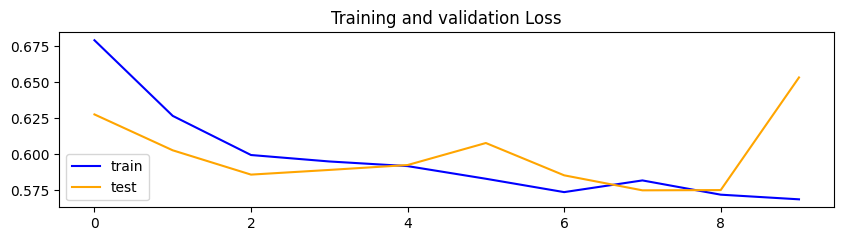

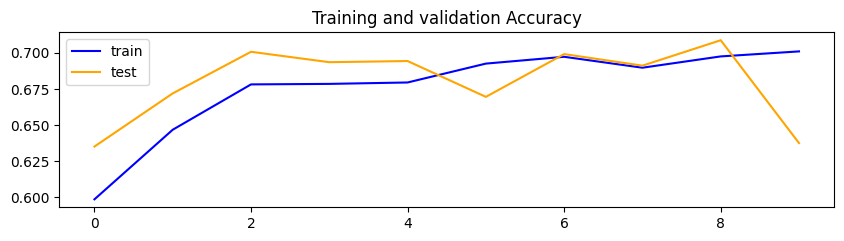

In [8]:
model_diagnostic_plot(model_hist,loss=True, accuracy=True)

In [9]:
resnet.save("/home/mwaniki-new/Documents/deep_learning/Cats_Dogs/src/Model/resnetmodel.h5")